In [1]:
from random import seed
seed(10)
from tensorflow.random import set_seed
set_seed(10)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from tensorflow.keras.layers import Embedding, LSTM, TimeDistributed, Flatten, Dense

In [8]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

17465344/17464789 [==============================] - 1s 0us/step


/Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


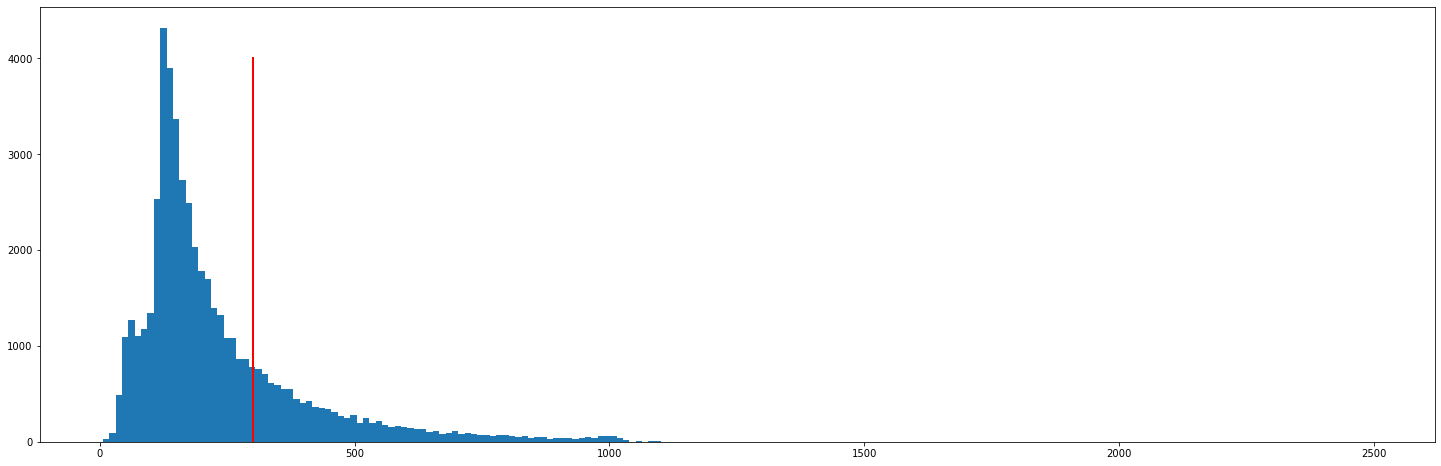

Average review length: 234.75892
Standard deviation: 173
No of reviews with length below 300: 38583


In [9]:

length = [len(i) for i in data]
plt.figure(figsize=(25,8))
plt.hist(length, bins= 200)
plt.plot([300, 300], [0, 4000], 'r', linewidth=2.0)
plt.show()
print("Average review length: {}".format(np.mean(length)))
print("Standard deviation: {}".format(round(np.std(length))))
print("No of reviews with length below 300: {}".format(sum(i < 301 for i in length)))

In [10]:
from keras.preprocessing.sequence import pad_sequences
data_padded = pad_sequences(data, padding='post', maxlen=300)

In [11]:
print('Number of reviews: {}, Number of words in each review: {}'.format(data_padded.shape[0],data_padded.shape[1]))

Number of reviews: 50000, Number of words in each review: 300


In [12]:
print('Number of labels: {}'.format(labels.shape[0]))

Number of labels: 50000


In [13]:
data_padded[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [14]:
labels[0]

1

In [15]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1646592/1641221 [==============================] - 0s 0us/step


In [16]:
print(" ".join([reverse_word_index.get(n-3, '#') for n in data_padded[1]]))

# big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal # the hair is big lots of boobs # men wear those cut # shirts that show off their # sickening that men actually wore them and the music is just # trash that plays over and over again in almost every scene there is trashy music boobs and # taking away bodies and the gym still doesn't close for # all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

In [17]:
labels[1]

0

In [18]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data_padded, labels, test_size=0.20, random_state=0)

In [20]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=300))
model.add(LSTM(units=100, return_sequences=True, dropout=0.2))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 100)          80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          10100     
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30001     
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(train_X, np.array(train_y), batch_size=300, epochs=3, validation_split=0.1, verbose=1)

Epoch 1/3
120/120 [==============================] - 89s 739ms/step - loss: 0.4015 - accuracy: 0.8008 - val_loss: 0.2739 - val_accuracy: 0.8882
Epoch 2/3
120/120 [==============================] - 89s 739ms/step - loss: 0.2234 - accuracy: 0.9114 - val_loss: 0.2712 - val_accuracy: 0.8863
Epoch 3/3
120/120 [==============================] - 89s 743ms/step - loss: 0.1817 - accuracy: 0.9309 - val_loss: 0.2889 - val_accuracy: 0.8848


In [24]:
results = model.evaluate(test_X, test_y)

313/313 [==============================] - 11s 35ms/step - loss: 0.2863 - accuracy: 0.8903


In [25]:
from sklearn.metrics import confusion_matrix
predict_y = (model.predict(test_X) > 0.5).astype("int32").flatten()
confusion_matrix(test_y, predict_y)

array([[4485,  508],
       [ 589, 4418]])

In [26]:
print('Prediction: {} | Ground Truth: {}'.format(((model.predict(test_X[0].reshape(-1,300)) > 0.5).astype("int32").flatten()), test_y[0]))

Prediction: [1] | Ground Truth: 1
